# Preparing the Dataset

In [ ]:
pip install datasets==2.14.5


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found

In [ ]:
from datasets import load_dataset

# Load the 2017 IWSLT dataset, English–French
dataset = load_dataset("iwslt2017", "iwslt2017-en-fr")

print(dataset)
print("Train size:", len(dataset["train"]))
print("Validation size:", len(dataset["validation"]))
print("Test size:", len(dataset["test"]))

# Access sentences
print(dataset["train"][0]["translation"]["en"])
print(dataset["train"][0]["translation"]["fr"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/232825 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8597 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/890 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 232825
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 8597
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 890
    })
})
Train size: 232825
Validation size: 890
Test size: 8597
Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this stage twice; I'm extremely grateful.
Merci beaucoup, Chris. C'est vraiment un honneur de pouvoir venir sur cette scène une deuxième fois. Je suis très reconnaissant.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# saving the dataset so I don't need to redownload it every time
dataset.save_to_disk("/content/drive/MyDrive/datasets/iwslt2017_en_fr")

NameError: name 'dataset' is not defined

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from datasets import load_from_disk

Dataset = load_from_disk("/content/drive/MyDrive/datasets/iwslt2017_en_fr")
print(Dataset)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 232825
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 8597
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 890
    })
})


# Implementing the Tokenizer

In [ ]:
Train_en = [sentence['translation']['en'] for sentence in Dataset['train']]
Train_fr = [sentence['translation']['fr'] for sentence in Dataset['train']]

Val_en = [sentence['translation']['en'] for sentence in Dataset['validation']]
Val_fr = [sentence['translation']['fr'] for sentence in Dataset['validation']]

Test_en = [sentence['translation']['en'] for sentence in Dataset['test']]
Test_fr = [sentence['translation']['fr'] for sentence in Dataset['test']]

In [ ]:
#instead of importing the Tokenizer, we will code it from scratch.

class BPETokenizer:
  def __init__(self, Dataset, Vocab_size, Train_en, Train_fr, Val_en, Val_fr, Test_en, Test_fr):

    self.Dataset = Dataset
    self.Vocab_size = Vocab_size

    self.Train_en = Train_en
    self.Train_fr = Train_fr

    self.Val_en = Val_en
    self.Val_fr = Val_fr

    self.Test_en = Test_en
    self.Test_fr = Test_fr

    self.WordsFrequencies = {}
    self.Tokens = {"<pad>": 0, "<bos>": 1, "<eos>": 2, "<unk>": 3, "▁":4}


  def Initialize_Tokens(self):
    indexation = 5
    for sentence in self.Train_en:
      for char in sentence:
        if self.Tokens.get(char, -1) == -1:
          if char != '':
            self.Tokens[char] = indexation
            indexation += 1


  def GetWordsFrequencies(self):
    for sentence in self.Train_en:
          words = sentence.strip().split()
          for word in words:
            word = "▁" + word
            if self.WordsFrequencies.get(word, -1) == -1:
              self.WordsFrequencies[word] = 1
            else:
              self.WordsFrequencies[word] += 1

    for sentence in self.Train_fr:
          words = sentence.strip().split()
          for word in words:
            word = "▁" + word
            if self.WordsFrequencies.get(word, -1) == -1:
              self.WordsFrequencies[word] = 1
            else:
              self.WordsFrequencies[word] += 1

  def GetTheMostFrequentPair(self):
    PairFrequencies = {}
    for key in self.WordsFrequencies:
      pass

  def SplitByTokens(self, word):
    tokens = []
    i = 0
    n = len(word)
    while i < n:
        match = None
        # Try longest substring starting at i
        for j in range(n, i, -1):
            sub = word[i:j]
            if sub in self.Tokens:   # found in vocab
                match = sub
                break
        if match:
            tokens.append(match)
            i = j
        else:
            tokens.append("<unk>")
            i += 1
    return tokens

  def MostFrequentPair(self):
    PairFrequencies = {}
    for word in self.WordsFrequencies.keys():
      tokens = self.SplitByTokens(word)
      n = len(tokens)
      for i in range(n-1):
        new_token = tokens[i]+tokens[i+1]
        if PairFrequencies.get(new_token, -1) == -1:
          PairFrequencies[new_token] = 1
        else:
          PairFrequencies[new_token] += 1
    return PairFrequencies













  """
  datatset is a list of sentences this function returns the tokenized form
  ["I", "love", "Banana"] => [1, 65, 6542]
  it returns the list of tokens depending on the language
  """

  def Tokenize(self, dataset, lang = "en"):
    pass

  #this function gets a list of tokens and fabricates every possible pair of tokens
  def Pair_of_Tokens(self, Tokens):
    A = []
    for key1 in Tokens.keys():
      for key2 in Tokens.keys():
        A.append([key1, key2])

    return A

  # this function corresponds to an iteration over the dataset and return the current_new_token state
  def TokensIteration(self, Current_Tokens, dataset):
    pass



In [ ]:
Tokenizer = BPETokenizer(Dataset, 16000, Train_en, Train_fr, Val_en, Val_fr, Test_en, Test_fr,)

Tokenizer.Initialize_Tokens()


In [ ]:
print(Tokenizer.Tokens)

{'<pad>': 0, '<bos>': 1, '<eos>': 2, '<unk>': 3, '▁': 4, 'T': 5, 'h': 6, 'a': 7, 'n': 8, 'k': 9, ' ': 10, 'y': 11, 'o': 12, 'u': 13, 's': 14, 'm': 15, 'c': 16, ',': 17, 'C': 18, 'r': 19, 'i': 20, '.': 21, 'A': 22, 'd': 23, 't': 24, "'": 25, 'l': 26, 'g': 27, 'e': 28, 'v': 29, 'p': 30, 'w': 31, ';': 32, 'I': 33, 'x': 34, 'f': 35, 'b': 36, 'P': 37, 'F': 38, 'N': 39, '!': 40, 'q': 41, '-': 42, 'S': 43, 'W': 44, 'H': 45, '5': 46, '0': 47, 'D': 48, 'j': 49, 'Y': 50, '?': 51, '4': 52, 'E': 53, '2': 54, '3': 55, '8': 56, 'L': 57, '"': 58, 'V': 59, 'G': 60, ':': 61, 'z': 62, 'B': 63, 'U': 64, 'M': 65, 'J': 66, 'O': 67, '1': 68, '9': 69, 'R': 70, 'K': 71, '6': 72, '$': 73, 'Z': 74, '7': 75, '/': 76, 'X': 77, '&': 78, '[': 79, ']': 80, 'é': 81, 'ù': 82, 'Q': 83, 'â': 84, ')': 85, '(': 86, 'ć': 87, '+': 88, 'ñ': 89, 'ï': 90, 'á': 91, '♫': 92, '%': 93, '#': 94, 'í': 95, '=': 96, '’': 97, 'ó': 98, '@': 99, 'º': 100, '˚': 101, 'ö': 102, '*': 103, '–': 104, 'É': 105, '…': 106, 'ü': 107, 'ä': 108, 'ò'

In [ ]:
Tokenizer.GetWordsFrequencies()

In [ ]:
print(Tokenizer.WordsFrequencies)

{'▁Thank': 2402, '▁you': 46559, '▁so': 13080, '▁much,': 214, '▁Chris.': 71, '▁And': 39331, "▁it's": 12682, '▁truly': 333, '▁a': 131161, '▁great': 2258, '▁honor': 108, '▁to': 114292, '▁have': 24547, '▁the': 182032, '▁opportunity': 463, '▁come': 3313, '▁this': 33394, '▁stage': 292, '▁twice;': 2, "▁I'm": 7801, '▁extremely': 396, '▁grateful.': 11, '▁I': 60483, '▁been': 6269, '▁blown': 47, '▁away': 1102, '▁by': 10397, '▁conference,': 48, '▁and': 97862, '▁want': 6228, '▁thank': 466, '▁all': 15107, '▁of': 105631, '▁for': 25746, '▁many': 4096, '▁nice': 404, '▁comments': 41, '▁about': 18463, '▁what': 18017, '▁had': 9706, '▁say': 2493, '▁other': 5839, '▁night.': 156, '▁that': 70353, '▁sincerely,': 1, '▁partly': 73, '▁because': 9704, '▁Put': 63, '▁yourselves': 36, '▁in': 66978, '▁my': 14637, '▁position.': 90, '▁flew': 113, '▁on': 33953, '▁Air': 83, '▁Force': 64, '▁Two': 213, '▁eight': 520, '▁years.': 939, '▁Now': 3046, '▁take': 4178, '▁off': 1725, '▁shoes': 97, '▁or': 12078, '▁boots': 25, '▁get':

In [ ]:
print(Tokenizer.SplitByTokens('▁Thank'))

['▁', 'T', 'h', 'a', 'n', 'k']


In [ ]:
print(Tokenizer.MostFrequentPair())

{'▁T': 2697, 'Th': 402, 'ha': 7097, 'an': 26145, 'nk': 904, '▁y': 395, 'yo': 580, 'ou': 14471, '▁s': 19887, 'so': 6082, '▁m': 12189, 'mu': 2073, 'uc': 2900, 'ch': 10858, 'h,': 735, '▁C': 4111, 'Ch': 888, 'hr': 1148, 'ri': 18337, 'is': 21314, 's.': 15440, '▁A': 3382, 'An': 487, 'nd': 10416, '▁i': 8734, 'it': 17741, "t'": 403, "'s": 2420, '▁t': 9546, 'tr': 12742, 'ru': 3095, 'ul': 6137, 'ly': 4195, '▁a': 13641, '▁g': 5395, 'gr': 4267, 're': 30666, 'ea': 6984, 'at': 20852, '▁h': 5348, 'ho': 5325, 'on': 34530, 'no': 6140, 'or': 15614, 'to': 8601, 'av': 2968, 've': 11041, 'th': 6017, 'he': 8001, '▁o': 4105, 'op': 4838, 'pp': 3665, 'po': 7113, 'rt': 6674, 'tu': 4964, 'un': 5518, 'ni': 8956, 'ty': 2551, '▁c': 20040, 'co': 15675, 'om': 8301, 'me': 15236, 'hi': 5666, 'st': 16432, 'ta': 12487, 'ag': 5976, 'ge': 7888, 'tw': 471, 'wi': 1262, 'ic': 11164, 'ce': 9958, 'e;': 520, '▁I': 1487, "I'": 26, "'m": 34, '▁e': 8287, 'ex': 4245, 'xt': 880, 'em': 9050, 'el': 10247, 'ra': 22670, 'te': 27984, 'ef'

# Implementing The transformer


In [ ]:
Train_en = [sentence['translation']['en'] for sentence in Dataset['train']]
Train_fr = [sentence['translation']['fr'] for sentence in Dataset['train']]

Val_en = [sentence['translation']['en'] for sentence in Dataset['validation']]
Val_fr = [sentence['translation']['fr'] for sentence in Dataset['validation']]

Test_en = [sentence['translation']['en'] for sentence in Dataset['test']]
Test_fr = [sentence['translation']['fr'] for sentence in Dataset['test']]

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

# Init BPE tokenizer
tokenizer = Tokenizer(models.BPE())
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

trainer = trainers.BpeTrainer(
    vocab_size=16000,
    special_tokens=["<pad>", "<bos>", "<eos>", "<unk>"]
)

# Combine English + French sentences
all_sentences = Train_en + Train_fr

# Train directly from the list of sentences
tokenizer.train_from_iterator(all_sentences, trainer)

# Test
print(tokenizer.encode("I love internships").tokens)


['I', 'love', 'intern', 'ships']


In [ ]:
Sentences_en = [tokenizer.encode(sentence).tokens for sentence in Train_en]
Sentences_fr = [tokenizer.encode(sentence).tokens for sentence in Train_fr]
print(tokenizer.encode("I love internships").tokens)

['I', 'love', 'intern', 'ships']


In [ ]:
import numpy as np

for k in range(0,3):
  i = np.random.randint(0,200000)
  print(Sentences_en[i])
  print(Sentences_fr[i])

['So', 'let', 'me', 'tell', 'you', 'a', 'story', '.']
['Permettez', '-', 'moi', 'de', 'vous', 'raconter', 'une', 'histoire', '.']
['I', 'started', 'jug', 'gling', 'a', 'long', 'time', 'ago', ',', 'but', 'long', 'before', 'that', ',', 'I', 'was', 'a', 'gol', 'fer', ',', 'and', 'that', "'", 's', 'what', 'I', 'was', ',', 'a', 'gol', 'fer', '.']
['Ça', 'fait', 'longtemps', 'que', 'je', 'j', 'ong', 'le', 'mais', 'bien', 'avant', 'ça', 'j', "'", 'étais', 'gol', 'fe', 'ur', ',', 'et', 'c', "'", 'est', 'ce', 'qui', 'me', 'défin', 'issait', ',', 'être', 'gol', 'fe', 'ur', '.']
['I', 'assure', 'you', ',', 'it', 'is', 'very', 'true', '.']
['Je', 'vous', 'assure', ',', 'c', "'", 'est', 'vrai', '.']


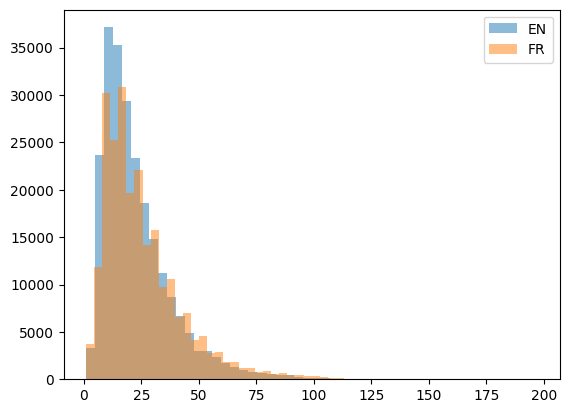

Max length EN: 197
Max length FR: 176


In [ ]:
lengths_en = [len(s) for s in Sentences_en]
lengths_fr = [len(s) for s in Sentences_fr]

import matplotlib.pyplot as plt
plt.hist(lengths_en, bins=50, alpha=0.5, label='EN')
plt.hist(lengths_fr, bins=50, alpha=0.5, label='FR')
plt.legend()
plt.show()

print("Max length EN:", max(lengths_en))
print("Max length FR:", max(lengths_fr))


In [ ]:
max_len = 120

cleaned_en = []
cleaned_fr = []

for en, fr in zip(Sentences_en, Sentences_fr):
    if len(en) <= max_len and len(fr) <= max_len:
        cleaned_en.append(en)
        cleaned_fr.append(fr)

print(f"Kept {len(cleaned_en)} of {len(Sentences_en)}")
print(f"Dropped {len(Sentences_en) - len(cleaned_en)} sentences")


Kept 232757 of 232825
Dropped 68 sentences


In [ ]:
print(cleaned_en[0])
print(cleaned_fr[0])

['Thank', 'you', 'so', 'much', ',', 'Chris', '.', 'And', 'it', "'", 's', 'truly', 'a', 'great', 'honor', 'to', 'have', 'the', 'opportunity', 'to', 'come', 'to', 'this', 'stage', 'twice', ';', 'I', "'", 'm', 'extremely', 'grateful', '.']
['Merci', 'beaucoup', ',', 'Chris', '.', 'C', "'", 'est', 'vraiment', 'un', 'honneur', 'de', 'pouvoir', 'venir', 'sur', 'cette', 'scène', 'une', 'deuxième', 'fois', '.', 'Je', 'suis', 'très', 'reconnaiss', 'ant', '.']


In [11]:
import torch
import torch.nn as nn

Vocab_size = 16000
Embedding_dim = 512
embedding = nn.Embedding(Vocab_size, Embedding_dim)

tokens = torch.tensor([[1, 7, 10, 1, 3],[1, 1, 12, 85, 10]])
print(tokens.shape)
out = embedding(tokens)
print(out.shape)

print((out[0, 0,:] == out[1, 0,:]).all())
print((out[0, 0,:] == out[1, 1, :]).all())

# Right now the tensor doesn't doesn't differentiate sentences like "Cat eats meat" or "meat eats cat"
# That's why we need to do positionnal encoding

torch.Size([2, 5])
torch.Size([2, 5, 512])
tensor(True)
tensor(True)


In [ ]:
# TODO list

# Class MultiHeadAttention
# Class EncoderLayer
# Class DecoderLayer
# Class Encoder
# Class Decoder
# Class Transformer

In [ ]:
class MultiHeadAttention: